In [28]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [30]:
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


##cnn

In [32]:
import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_f = st.fit_transform(x) 
from keras.utils import to_categorical
y = np.squeeze(y)
y -= np.min(y)
y = to_categorical(y, num_classes=0)

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
import pickle
pickle.dump(st, open('Standard_scalar.pkl', 'wb'))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D,Dense, Dropout
from tensorflow import keras
import keras.backend as K

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential()

# Add input layer
model.add(Dense(64, activation='relu', input_shape=(21,)))
model.add(BatchNormalization())

# Add hidden layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,315 (83.26 KB)

 Trainable params: 20,739 (81.01 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=30,epochs= 27)

Epoch 1/27


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4806 - loss: 1.1877 - val_accuracy: 0.1878 - val_loss: 3.2565
Epoch 2/27
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.6764 - val_accuracy: 0.6150 - val_loss: 1.0928
Epoch 3/27
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8265 - loss: 0.5595 - val_accuracy: 0.8216 - val_loss: 0.5760
Epoch 4/27
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8336 - loss: 0.5459 - val_accuracy: 0.8615 - val_loss: 0.4420
Epoch 5/27
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8328 - loss: 0.4837 - val_accuracy: 0.8615 - val_loss: 0.3965
Epoch 6/27
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3932 - val_accuracy: 0.8850 - val_loss: 0.3478
Epoch 7/27
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.3995 - val_accuracy: 0.8732 - val_loss: 0.3558
Epoch 8/27
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.3851 - val_accuracy: 0.8944 - val_loss: 0.3082
Epo

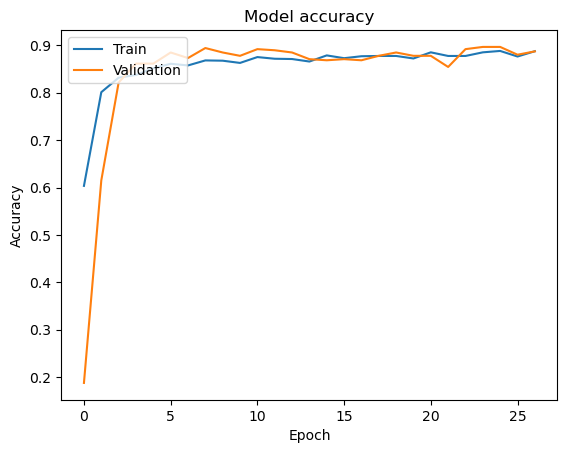

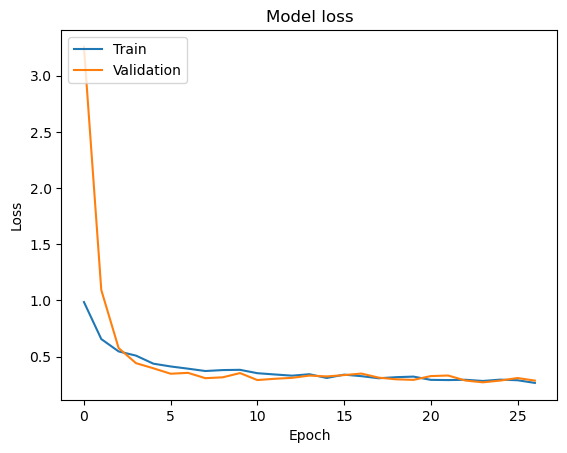

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
loss,accuracy= model.evaluate(x_test,y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)


 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9688 - loss: 0.1218

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9021 - loss: 0.2607 
Loss:  0.2867843806743622
Accuracy:  0.8873239159584045


In [ ]:
from keras.models import load_model 
model.save("fetalcnn1.h5") 
loaded_model = load_model("fetalcnn1.h5") 
loss, accuracy = loaded_model.evaluate(x_test,y_test) 
print("Loss: ", loss)
print("Accuracy: ", accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.9021 - loss: 0.2607
Loss:  0.2867843806743622
Accuracy:  0.8873239159584045


##dnn

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_f, y, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test= label_encoder.fit_transform(y_test)

In [ ]:
from keras.models import Sequential
import keras
fatal_model = Sequential([
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dense(256, activation="relu"),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(56, activation="relu"),
  keras.layers.Dense(3, activation="softmax")
])
fatal_model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam',
                 metrics=['accuracy'])
fatal_model_history =fatal_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7435 - loss: 0.6665 - val_accuracy: 0.8568 - val_loss: 0.3435
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8922 - loss: 0.2525 - val_accuracy: 0.8991 - val_loss: 0.2612
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9022 - loss: 0.2541 - val_accuracy: 0.8732 - val_loss: 0.2720
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9046 - loss: 0.2090 - val_accuracy: 0.8850 - val_loss: 0.2610
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9258 - loss: 0.1625 - val_accuracy: 0.8967 - val_loss: 0.2560
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9299 - loss: 0.1712 - val_accuracy: 0.8897 - val_loss: 0.2961
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9349 - loss: 0.1451 - val_accuracy: 0.9061 - val_loss: 0.2457
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9324 - loss: 0.1752 - val_accuracy: 0.9061 - val_loss: 0.2

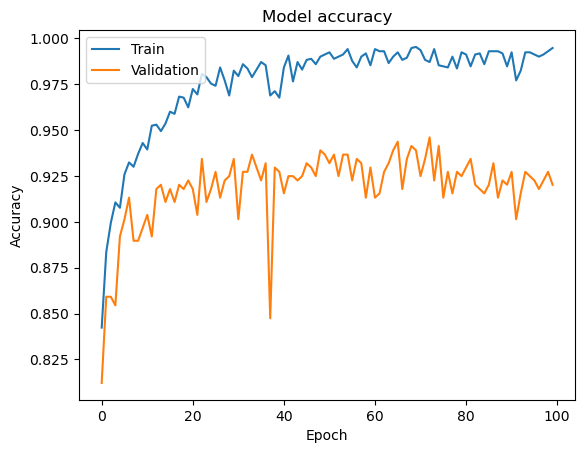

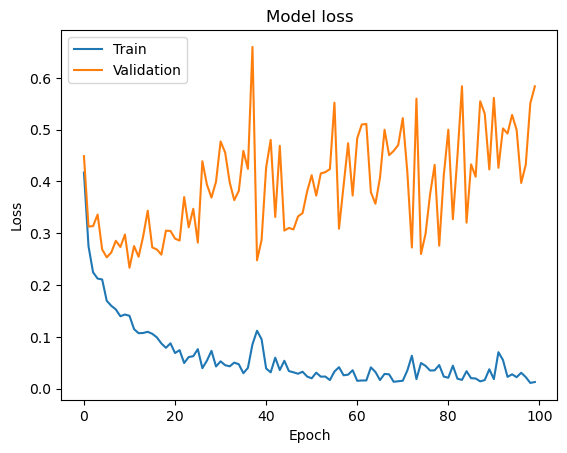

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(fatal_model_history.history['accuracy'])
plt.plot(fatal_model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(fatal_model_history.history['loss'])
plt.plot(fatal_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


<Axes: >

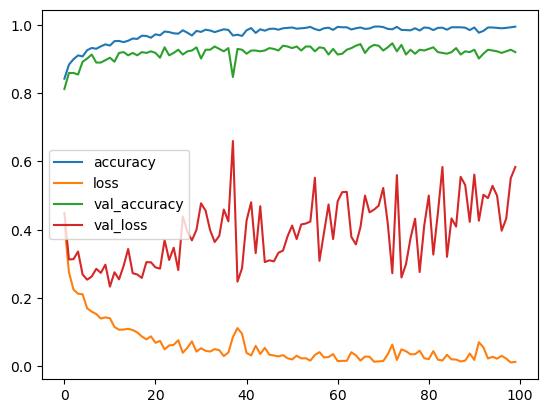

In [ ]:
pd.DataFrame(fatal_model_history.history).plot()

In [ ]:
loss,accuracy = fatal_model.evaluate(x_test,y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9196 - loss: 0.6625 
Loss:  0.5837228894233704
Accuracy:  0.920187771320343


In [ ]:
from keras.models import load_model 
fatal_model.save("fetaldnn1.h5") 
loaded_model = load_model("fetaldnn1.h5") 
loss, accuracy = loaded_model.evaluate(x_test,y_test) 
print("Loss: ", loss)
print("Accuracy: ", accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9196 - loss: 0.6625  
Loss:  0.5837228894233704
Accuracy:  0.920187771320343


##ann

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
yr= pd.get_dummies(y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xs= scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xs,yr,test_size=0.2)

In [ ]:
model_a = keras.Sequential([keras.layers.Dense(20,input_dim =(x_train.shape[1]),activation="relu",kernel_initializer="HeNormal"),
                          keras.layers.Dense(40,activation="relu"),
                          keras.layers.Dense(80,activation="relu"),
                          keras.layers.Dropout(0.3),
                          keras.layers.Dense(160,activation="relu"),
                          keras.layers.Dense(320,activation="relu"),
                          keras.layers.Dropout(0.3),
                          keras.layers.Dense(640,activation="relu"),
                          keras.layers.Dense(3,activation="softmax")
                         ])

In [ ]:
model_a.compile(loss=keras.losses.CategoricalCrossentropy(), 
                 optimizer='rmsprop',
                 metrics=['accuracy'])
history_a = model_a.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=101)

Epoch 1/101
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7538 - loss: 0.7104 - val_accuracy: 0.8709 - val_loss: 0.3474
Epoch 2/101
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8526 - loss: 0.3733 - val_accuracy: 0.8873 - val_loss: 0.3009
Epoch 3/101
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8565 - loss: 0.3602 - val_accuracy: 0.8779 - val_loss: 0.2950
Epoch 4/101
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8761 - loss: 0.3099 - val_accuracy: 0.8732 - val_loss: 0.2896
Epoch 5/101
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8812 - loss: 0.2704 - val_accuracy: 0.9014 - val_loss: 0.2683
Epoch 6/101
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9021 - loss: 0.2395 - val_accuracy: 0.8920 - val_loss: 0.2829
Epoch 7/101
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8995 - loss: 0.2320 - val_accuracy: 0.8803 - val_loss: 0.2925
Epoch 8/101
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9039 - loss: 0.2301 - val_accuracy: 0.8897 - v

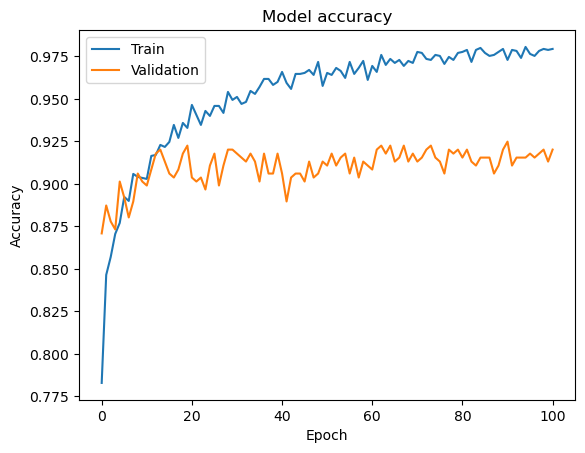

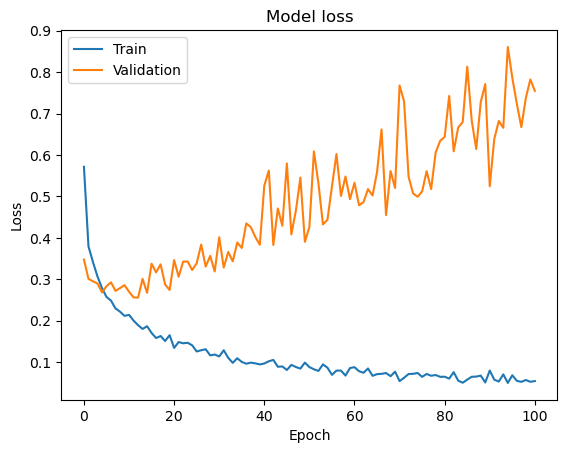

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
loss,accuracy= model_a.evaluate(x_test,y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9330 - loss: 0.8582 
Loss:  0.7545658946037292
Accuracy:  0.920187771320343


In [ ]:
from keras.models import load_model 
model_a.save("fetalann1.h5") 
loaded_model = load_model("fetalann1.h5") 
loss, accuracy = loaded_model.evaluate(x_test,y_test) 
print("Loss: ", loss)
print("Accuracy: ", accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.8582  
Loss:  0.7545658946037292
Accuracy:  0.920187771320343
